In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
df = pd.read_csv('./data_CdTe.csv')
df.head()

,M,CdX,Doping Site,?H(Cd-rich),?H(Mod),?H(Te-rich),(+3/+2),(+2/+1),(+1/0),(0/-1),...,Delta EN,Delta At. Num.,Delta Val.,# Cd Neighbors,# Te Neighbors,Corrected VBM (eV),Corrected CBM (eV),?H(Cd-rich).1,?H(Mod).1,?H(Te-rich).1
0,Li,CdTe,M_Cd,1.305,0.838,0.601,-0.851,-0.558,-0.262,0.052,...,-0.71,-45,-1,0,4,1.171,1.156,1.516,1.048,0.812
1,Na,CdTe,M_Cd,1.317,1.080,0.989,-0.756,-0.480,-0.187,0.142,...,-0.76,-37,-1,0,4,1.331,1.316,1.410,1.173,1.083
2,K,CdTe,M_Cd,1.892,1.655,1.677,-0.601,-0.277,-0.083,0.253,...,-0.87,-29,-1,0,4,1.662,1.647,2.179,1.942,1.965
3,Rb,CdTe,M_Cd,2.123,1.886,2.041,-0.552,-0.258,0.024,0.354,...,-0.87,-11,2,0,4,2.155,2.140,2.563,2.326,2.481
4,Cs,CdTe,M_Cd,2.392,2.155,2.375,-0.453,-0.234,0.103,0.469,...,-0.90,7,-1,0,4,2.000,2.000,3.000,3.000,3.000


In [3]:
yHcd = df["?H(Te-rich)"]
Xbase = df[["Period", "Group", "Site","# Cd Neighbors", "# Te Neighbors"]]
Xelemental = df.iloc[:,17:26]
Xdefect = df.iloc[:,28:]
X1 = Xbase.join(Xelemental)
X2 = Xbase.join(Xdefect)
X3 = X1.join(Xdefect)

In [4]:
y = yHcd.values[:]
X = X3.values[:,:]

In [5]:
len(y)

315

(array([ 9.,  8., 11., 23., 16., 26., 21., 48., 34., 24., 22., 16., 15.,
        12., 14.,  4.,  2.,  5.,  2.,  3.]),
 array([0.     , 0.44615, 0.8923 , 1.33845, 1.7846 , 2.23075, 2.6769 ,
        3.12305, 3.5692 , 4.01535, 4.4615 , 4.90765, 5.3538 , 5.79995,
        6.2461 , 6.69225, 7.1384 , 7.58455, 8.0307 , 8.47685, 8.923  ]),
 <a list of 20 Patch objects>)

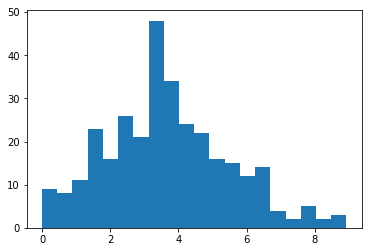

In [6]:
plt.hist(y, bins=20)

##### scaling the data to work better with the NN

In [7]:
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
scalarY.fit(y.reshape(315,1))
X = scalarX.transform(X)
y = scalarY.transform(y.reshape(315,1))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=110)

##### building the NN - adding layers, compile, fit, and evaluate

In [9]:
np.random.seed(100)
model = Sequential()

model.add(Dense(32, input_dim=19, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

In [10]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

In [11]:
history = model.fit(X_train, y_train, validation_split=0.1, shuffle=True, epochs=1000, verbose=0)

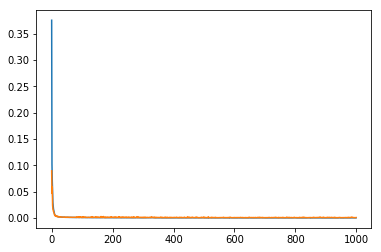

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

0.0007883656230004548


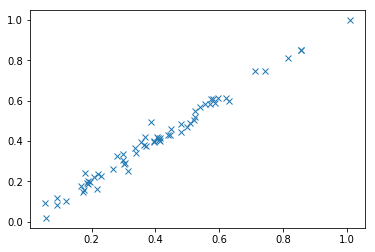

In [13]:
y_pred = model.predict(X_test)
print(mean_squared_error(y_pred, y_test))
plt.plot(y_pred, y_test, 'x')

#### Compare with other regressors

0.001153230195969005


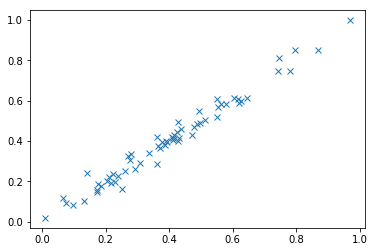

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(mean_squared_error(y_pred, y_test))
plt.plot(y_pred, y_test, 'x')

0.0009046689416421675


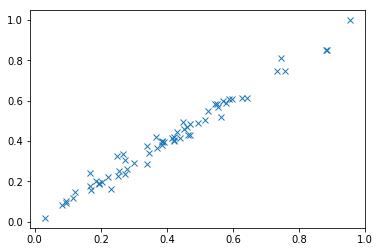

In [15]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=15, random_state=0, n_estimators=100)
reg.fit(X_train, y_train.reshape(len(y_train)))
y_pred = reg.predict(X_test)
print(mean_squared_error(y_pred, y_test))
plt.plot(y_pred, y_test, 'x')

0.0013523394330071327


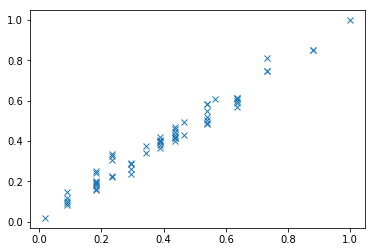

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
reg = DecisionTreeRegressor(max_depth=4, random_state=100)
reg.fit(X_train, y_train.reshape(len(y_train)))
y_pred = reg.predict(X_test)
print(mean_squared_error(y_pred, y_test))
plt.plot(y_pred, y_test, 'x')

0.001027127569484053


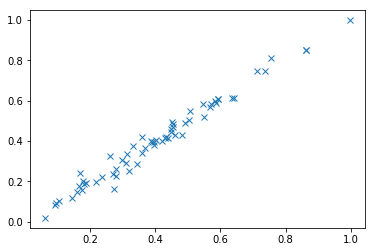

In [17]:
reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=1000, random_state=100)
reg.fit(X_train, y_train.reshape(len(y_train)))
y_pred = reg.predict(X_test)
print(mean_squared_error(y_pred, y_test))
plt.plot(y_pred, y_test, 'x')

In [18]:
len(y_train)

252